  #            Skin Cancer Detection

  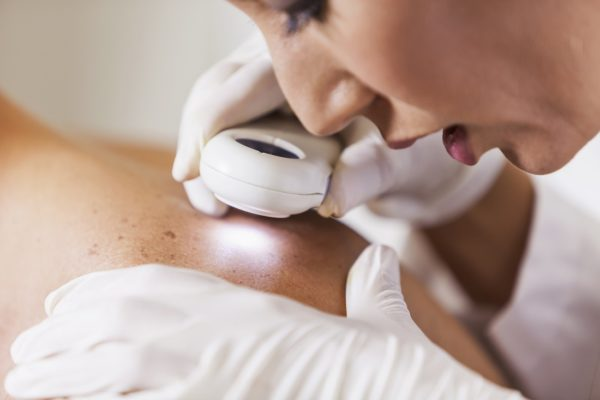

#  Skin cancer
Skin cancer includes basal cell skin cancer, squamous cell skin cancers and other rare types. These skin cancers are known as non melanoma skin cancer.

# What is skin cancer?
There are 2 main types of skin cancer: Non melanoma skin cancer and melanoma skin cancer. This section is about non melanoma skin cancer.

Melanoma is a different type of skin cancer that develops from skin cells called melanocytes.

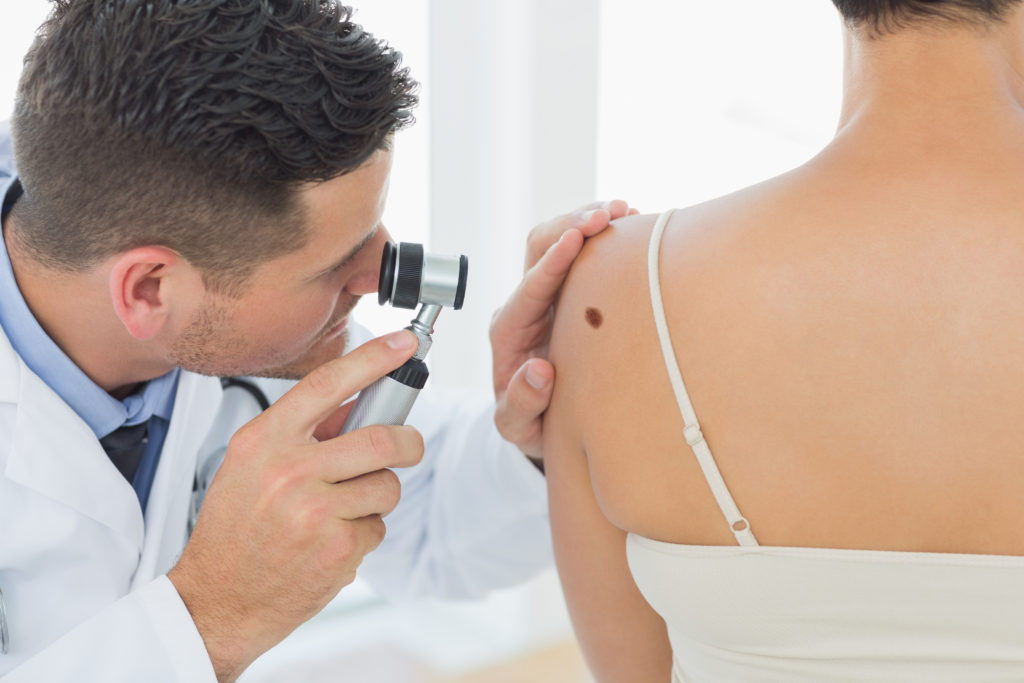

  Develop practical skills in applying Deep Learning for medical image classification. The tasks
focus on Skin Cancer Detection using CNNs. Internees will
preprocess datasets, apply data augmentation, and fine-tune pre-trained models for accurate
classification.
  # Import Required Libraries

In [ ]:
# For data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For image processing
import os
import cv2

# For deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, EfficientNetB0

# For metrics and performance evaluation
from sklearn.metrics import classification_report, confusion_matrix

# For working with files
import zipfile
from google.colab import files


# Upload and Extract the Dataset

upload the dataset from the machine

In [ ]:
# Step 1: Upload ZIP File
from google.colab import files

uploaded = files.upload()  # This will open a file upload dialog in Colab


Saving ISIC-images (1).zip to ISIC-images (1).zip


# Extract the ZIP file:

In [ ]:
# Step 2: Extract ZIP File
import zipfile
import os

# Get the uploaded ZIP file name
zip_file_name = list(uploaded.keys())[0]

# Define the extraction directory
extract_dir = './dataset'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Confirm extraction
print("Files extracted to:", extract_dir)
print("Contents:", os.listdir(extract_dir))


Files extracted to: ./dataset
Contents: ['ISIC_2261475.jpg', 'ISIC_7427737.jpg', 'ISIC_9105056.jpg', 'ISIC_8839155.jpg', 'ISIC_2509654.jpg', 'ISIC_2310644.jpg', 'ISIC_1712676.jpg', 'ISIC_0172164.jpg', 'licenses', 'ISIC_9869851.jpg', 'ISIC_3474813.jpg', 'ISIC_5240127.jpg', 'ISIC_1603933.jpg', 'ISIC_4289355.jpg', 'ISIC_1663010.jpg', 'ISIC_2175835.jpg', 'ISIC_2078832.jpg', 'ISIC_8857559.jpg', 'ISIC_7522225.jpg', 'ISIC_5568259.jpg', 'ISIC_6671739.jpg', 'ISIC_8696456.jpg', 'ISIC_3142684.jpg', 'ISIC_4441584.jpg', 'ISIC_8822606.jpg', 'ISIC_1812976.jpg', 'ISIC_2122804.jpg', 'ISIC_5178159.jpg', 'ISIC_0307245.jpg', 'ISIC_4240489.jpg', 'ISIC_2005504.jpg', 'ISIC_8328686.jpg', 'ISIC_6075122.jpg', 'ISIC_8900588.jpg', 'ISIC_0290929.jpg', 'ISIC_5426283.jpg', 'ISIC_5171889.jpg', 'ISIC_7865861.jpg', 'ISIC_1391928.jpg', 'ISIC_7871997.jpg', 'ISIC_5506628.jpg', 'ISIC_6591641.jpg', 'metadata.csv', 'ISIC_2452039.jpg', 'ISIC_3558881.jpg', 'ISIC_6779413.jpg', 'ISIC_8584069.jpg', 'attribution.txt', 'ISIC_535394

# Check Dataset Structure

In [ ]:
# Check the main directory structure
import os

print("Main Directory Contents:")
print(os.listdir('./dataset'))

# If there are subfolders, list their contents
for folder in os.listdir('./dataset'):
    folder_path = os.path.join('./dataset', folder)
    if os.path.isdir(folder_path):
        print(f"\nContents of {folder}:")
        print(os.listdir(folder_path))


Main Directory Contents:
['ISIC_2261475.jpg', 'ISIC_7427737.jpg', 'ISIC_9105056.jpg', 'ISIC_8839155.jpg', 'ISIC_2509654.jpg', 'ISIC_2310644.jpg', 'ISIC_1712676.jpg', 'ISIC_0172164.jpg', 'licenses', 'ISIC_9869851.jpg', 'ISIC_3474813.jpg', 'ISIC_5240127.jpg', 'ISIC_1603933.jpg', 'ISIC_4289355.jpg', 'ISIC_1663010.jpg', 'ISIC_2175835.jpg', 'ISIC_2078832.jpg', 'ISIC_8857559.jpg', 'ISIC_7522225.jpg', 'ISIC_5568259.jpg', 'ISIC_6671739.jpg', 'ISIC_8696456.jpg', 'ISIC_3142684.jpg', 'ISIC_4441584.jpg', 'ISIC_8822606.jpg', 'ISIC_1812976.jpg', 'ISIC_2122804.jpg', 'ISIC_5178159.jpg', 'ISIC_0307245.jpg', 'ISIC_4240489.jpg', 'ISIC_2005504.jpg', 'ISIC_8328686.jpg', 'ISIC_6075122.jpg', 'ISIC_8900588.jpg', 'ISIC_0290929.jpg', 'ISIC_5426283.jpg', 'ISIC_5171889.jpg', 'ISIC_7865861.jpg', 'ISIC_1391928.jpg', 'ISIC_7871997.jpg', 'ISIC_5506628.jpg', 'ISIC_6591641.jpg', 'metadata.csv', 'ISIC_2452039.jpg', 'ISIC_3558881.jpg', 'ISIC_6779413.jpg', 'ISIC_8584069.jpg', 'attribution.txt', 'ISIC_5353942.jpg', 'ISIC_1

# Data Preprocessing:
○ Load the dataset, normalize pixel values to [0, 1].
○ Resize images to a fixed size (e.g., 224x224 for compatibility with CNNs).
○ Split the dataset into training, validation, and testing sets.
# Load and Inspect Metadata

In [ ]:
# Load metadata
import pandas as pd

metadata_path = './dataset/metadata.csv'
metadata = pd.read_csv(metadata_path)

# Display the first few rows
print("Metadata Preview:")
print(metadata.head())

# Check the columns
print("\nColumn Names:")
print(metadata.columns)


Metadata Preview:
        isic_id                       attribution copyright_license  \
0  ISIC_0172164  International Dermoscopy Society          CC-BY-NC   
1  ISIC_0290929  International Dermoscopy Society          CC-BY-NC   
2  ISIC_0307245  International Dermoscopy Society          CC-BY-NC   
3  ISIC_1194491  International Dermoscopy Society          CC-BY-NC   
4  ISIC_1225585  International Dermoscopy Society          CC-BY-NC   

   age_approx anatom_site_general   anatom_site_special diagnosis_1  \
0          45     lower extremity  acral palms or soles   Malignant   
1          85     lower extremity  acral palms or soles   Malignant   
2          70     upper extremity  acral palms or soles   Malignant   
3          75     lower extremity  acral palms or soles   Malignant   
4          45     lower extremity  acral palms or soles      Benign   

                                       diagnosis_2        diagnosis_3  \
0  Malignant melanocytic proliferations (Melanoma)  Mel

# Data Preparation

**1. Prepare the Data**

Append .jpg to isic_id to get full image filenames.
Use diagnosis_1 to label images as binary (e.g., Malignant=1 and others=0).
**2. Normalize and Resize**

Load images using OpenCV or PIL, normalize pixel values to [0, 1], and resize them to 224x224.

**3. Split the Dataset**

Split the dataset into training (70%), validation (15%), and testing (15%).

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
dataset_dir = './dataset/'
image_dir = dataset_dir  # Images are in the root directory

# Add .jpg to isic_id and create full image paths
metadata['image_path'] = metadata['isic_id'] + '.jpg'
metadata['image_path'] = metadata['image_path'].apply(lambda x: os.path.join(image_dir, x))

# Convert diagnosis_1 to binary labels (Malignant=1, others=0)
metadata['label'] = metadata['diagnosis_1'].apply(lambda x: 1 if x == 'Malignant' else 0)

# Check the updated metadata
print("Updated Metadata:")
print(metadata[['image_path', 'label']].head())


Updated Metadata:
                   image_path  label
0  ./dataset/ISIC_0172164.jpg      1
1  ./dataset/ISIC_0290929.jpg      1
2  ./dataset/ISIC_0307245.jpg      1
3  ./dataset/ISIC_1194491.jpg      1
4  ./dataset/ISIC_1225585.jpg      0


# Normalize, Resize, and Split the Dataset

we’ll load the images, normalize pixel values to [0, 1], resize them to 224x224, and split the dataset into training, validation, and testing sets.



In [ ]:
# Parameters
IMG_SIZE = 224  # Resize all images to 224x224
test_size = 0.15  # 15% for testing
val_size = 0.15  # 15% for validation from the remaining train set

# Load, normalize, and resize images
def preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)  # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 224x224
        img = img / 255.0  # Normalize pixel values to [0, 1]
        return img
    except Exception as e:
        print(f"Error processing image: {image_path}, {e}")
        return None

# Load images and labels
images = []
labels = []

for idx, row in metadata.iterrows():
    img = preprocess_image(row['image_path'])
    if img is not None:
        images.append(img)
        labels.append(row['label'])

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=(test_size + val_size), random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_size / (test_size + val_size)), random_state=42, stratify=y_temp)

# Print dataset shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (35, 224, 224, 3), (35,)
Validation set: (7, 224, 224, 3), (7,)
Test set: (8, 224, 224, 3), (8,)


In [ ]:
# Select only the relevant columns for splitting
metadata = metadata[['image_path', 'label']]

# Split the metadata into training, validation, and test sets
train_metadata, temp_metadata = train_test_split(metadata, test_size=0.4, stratify=metadata['label'])
val_metadata, test_metadata = train_test_split(temp_metadata, test_size=0.5, stratify=temp_metadata['label'])

# Check the shape of each split
print(f"Training set: {train_metadata.shape}")
print(f"Validation set: {val_metadata.shape}")
print(f"Test set: {test_metadata.shape}")


Training set: (30, 2)
Validation set: (10, 2)
Test set: (10, 2)


# Convert labels to strings

In [ ]:
train_metadata['label'] = train_metadata['label'].astype(str)
val_metadata['label'] = val_metadata['label'].astype(str)
test_metadata['label'] = test_metadata['label'].astype(str)


# Data Augmentation

Let's apply data augmentation (e.g., random rotation, flipping, zooming, and brightness adjustments) to help generalize the model and avoid overfitting

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for data augmentation in training set
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,           # Normalize pixel values to [0, 1]
    rotation_range=20,           # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally
    height_shift_range=0.2,      # Randomly shift images vertically
    shear_range=0.2,             # Randomly apply shearing transformations
    zoom_range=0.2,              # Randomly zoom in/out on images
    horizontal_flip=True         # Randomly flip images horizontally
)

# Initialize the ImageDataGenerator for validation and test sets (no augmentation, just rescaling)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Training set generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_metadata,    # DataFrame containing image paths and labels
    x_col='image_path',          # Column containing image file paths
    y_col='label',               # Column containing class labels
    target_size=(224, 224),      # Resize images to match your model's input shape
    batch_size=32,               # Batch size
    class_mode='binary'          # Binary classification (Pneumonia or Normal)
)

# Validation set generator
val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_metadata,     #validation DataFrame
    x_col='image_path',         # Column containing image file paths
    y_col='label',              # Column containing class labels
    target_size=(224, 224),     # Resize images to match your model's input shape
    batch_size=32,              # Batch size
    class_mode='binary'         # Binary classification
)

# Test set generator
test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_metadata,    # test DataFrame
    x_col='image_path',         # Column containing image file paths
    y_col='label',              # Column containing class labels
    target_size=(224, 224),     # Resize images to match your model's input shape
    batch_size=32,              # Batch size
    class_mode='binary'         # Binary classification
)


Found 30 validated image filenames belonging to 2 classes.
Found 10 validated image filenames belonging to 2 classes.
Found 10 validated image filenames belonging to 2 classes.


# Model Development

Now that the dataset is ready, we can move forward to developing the model using transfer learning with a pre-trained CNN (e.g., ResNet50, EfficientNet) for binary classification.
We'll replace the last layer to match our problem (binary classification).
# Compile and Train the Model

Use Binary Crossentropy as the loss function, Adam optimizer, and accuracy as a metric.

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the pre-trained ResNet50 model (without the top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  #can adjust this number
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.1333 - loss: 0.8660 - val_accuracy: 0.9000 - val_loss: 0.4010
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.8667 - loss: 0.5234 - val_accuracy: 0.9000 - val_loss: 0.5656
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8667 - loss: 0.7483 - val_accuracy: 0.9000 - val_loss: 0.6308
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.8667 - loss: 0.8347 - val_accuracy: 0.9000 - val_loss: 0.6288
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8667 - loss: 0.8319 - val_accuracy: 0.9000 - val_loss: 0.5800
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8667 - loss: 0.7678 - val_accuracy: 0.9000 - val_loss: 0.4988
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8667 - loss: 0.6575 - val_accuracy: 0.9000 - val_loss: 0.4022
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8667 - loss: 0.5248 - val_accuracy: 0.9000 - val_loss: 0.3286
Epoch 9/10
1/1 ━━

# Fine-Tuning the Model


In [ ]:
# Unfreeze the top layers of the ResNet50 model
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers, for example
    layer.trainable = True

# Recompile the model after unfreezing
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Continue training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Continue for more epochs
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.8667 - loss: 0.4355 - val_accuracy: 0.9000 - val_loss: 0.5363
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8667 - loss: 0.4168 - val_accuracy: 0.9000 - val_loss: 0.5236
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8667 - loss: 0.3977 - val_accuracy: 0.9000 - val_loss: 0.5115
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.8667 - loss: 0.3867 - val_accuracy: 0.9000 - val_loss: 0.5002
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8667 - loss: 0.3795 - val_accuracy: 0.9000 - val_loss: 0.4900
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8667 - loss: 0.3758 - val_accuracy: 0.9000 - val_loss: 0.4809
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8667 - loss: 0.3741 - val_accuracy: 0.9000 - val_loss: 0.4730
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.8667 - loss: 0.3728 - val_accuracy: 0.9000 - val_loss: 0.4663
Epoch 

# Evaluating on the Test Set


After training for the desired number of epochs, you can evaluate the model on the test set to see how it generalizes to unseen data.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9000 - loss: 0.4515
Test Accuracy: 0.8999999761581421


# Visualizing Results

we can also plot the accuracy and loss curves to see the model's performance over the epochs.

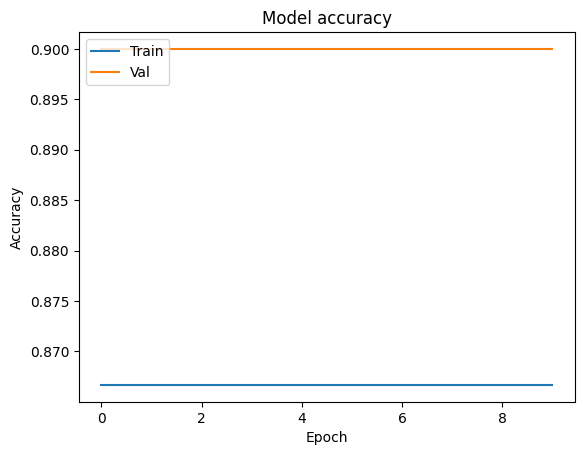

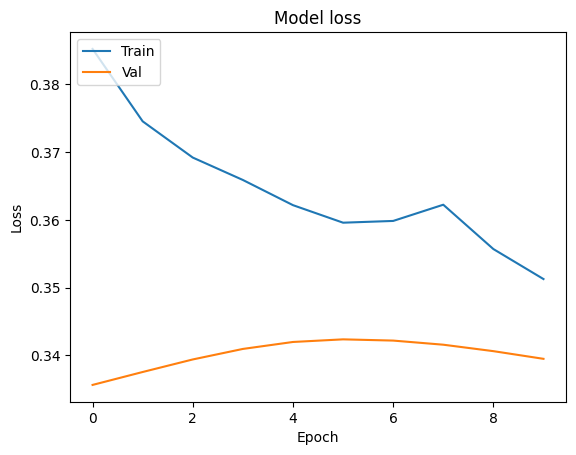

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


# Evaluate

using accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the predictions from the model on the test dataset
test_predictions = model.predict(test_generator)
test_predictions = (test_predictions > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Get the true labels for the test set
test_labels = test_generator.labels

# Evaluate the model
accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions)

# Print the evaluation results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Accuracy: 0.9000
Precision: 0.9000
Recall: 1.0000
F1-Score: 0.9474


# Plotting Confusion Matrix (For Precision, Recall, F1-Score)


The confusion matrix is a great visualization to show how well the model is distinguishing between classes.

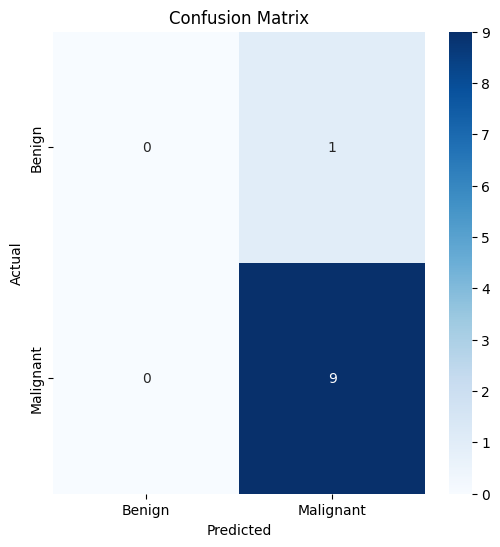

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Plotting Precision-Recall Curve


To plot the precision-recall curve, you can use sklearn's precision_recall_curve.

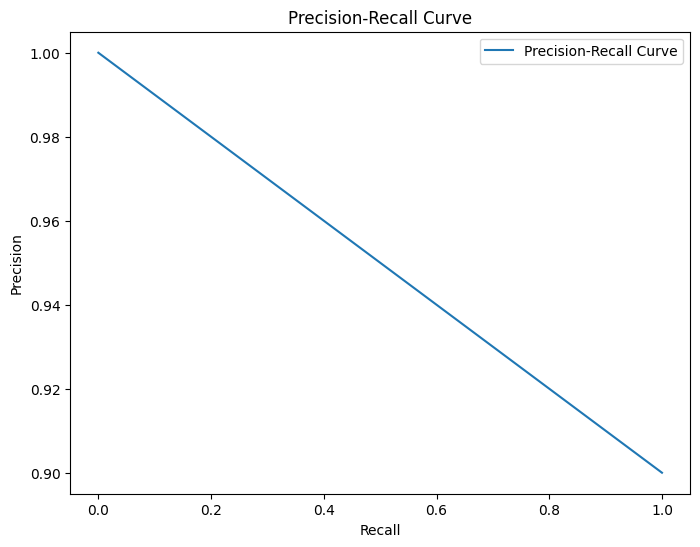

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the precision-recall curve data
precision, recall, thresholds = precision_recall_curve(test_labels, test_predictions)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


# Plotting ROC Curve and AUC

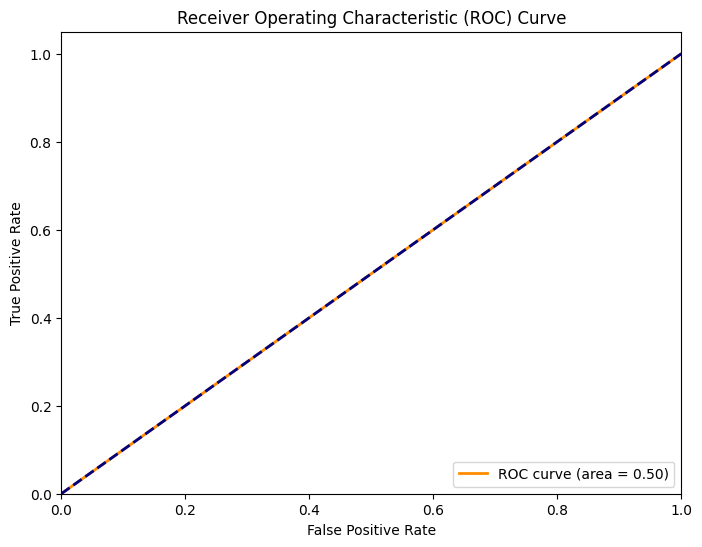

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get ROC curve data
fpr, tpr, _ = roc_curve(test_labels, test_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Heilight Benign and Malignant images

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<ipython-input-47-c3b8fa27fdcd>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f"True: {class_names[int(true_labels[i])]} \nPred: {class_names[int(predicted_labels[i])]}",


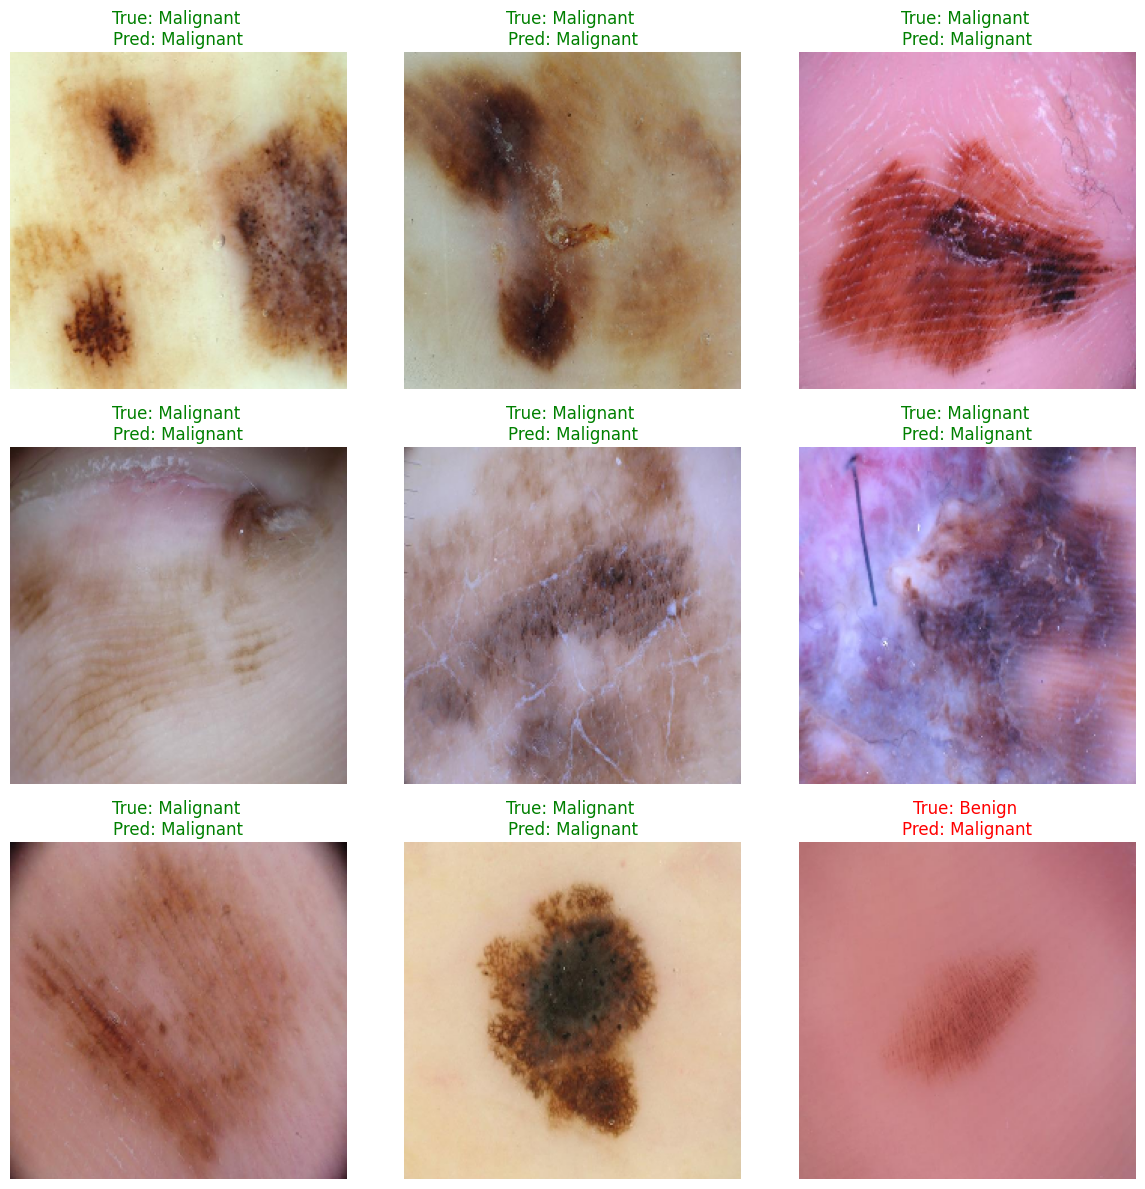

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample batch of images from the test set
test_images, test_labels = next(iter(test_generator))

# Predict the labels for the test images
predictions = model.predict(test_images)

# Map predictions to class labels (assuming binary classification)
predicted_labels = (predictions > 0.5).astype("int32")  # Convert to binary labels (0 or 1)
true_labels = test_labels.astype("int32")  # Use the test_labels directly for binary classification

# Class names
class_names = ['Benign', 'Malignant']

# Plot some images with predictions
plt.figure(figsize=(12, 12))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    plt.title(
        f"True: {class_names[int(true_labels[i])]} \nPred: {class_names[int(predicted_labels[i])]}",
        color="green" if true_labels[i] == predicted_labels[i] else "red",
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions: [[0.76375216]
 [0.80845064]
 [0.7679866 ]
 [0.7654127 ]
 [0.7659148 ]
 [0.7700565 ]
 [0.7684529 ]
 [0.7738869 ]
 [0.7758041 ]
 [0.7740471 ]]
Predicted Labels: [0 0 0 0 0 0 0 0 0 0]
Test Labels (True): [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


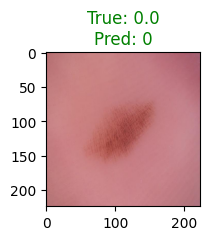

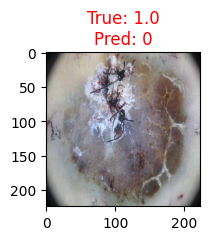

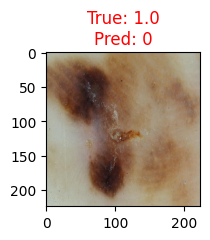

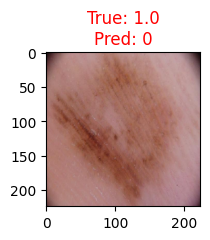

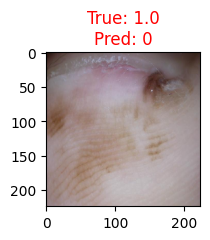

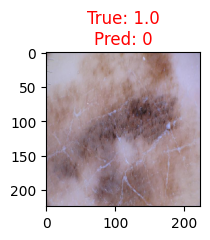

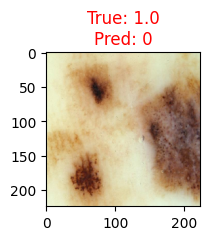

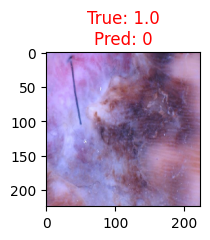

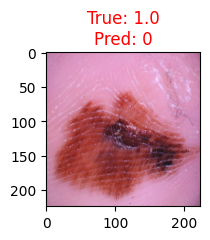

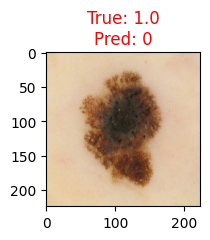

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Check predictions
predictions = model.predict(test_images)
print("Predictions:", predictions)
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted Labels:", predicted_labels)

# Ensure test_labels are in the correct format
print("Test Labels (True):", test_labels)

# Loop through test images and plot
for i in range(len(test_images)):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i])
    plt.title(f"True: {test_labels[i]}\nPred: {predicted_labels[i]}", color="green" if test_labels[i] == predicted_labels[i] else "red")
    plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9000 - loss: 0.3744
Test accuracy: 0.8999999761581421
Test loss: 0.3744491636753082
